In [10]:
import pyarrow as pa 
import pyarrow.parquet as pq 
import pandas as pd 
import numpy as np
import random as random
import datetime

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [4]:
table2 = pq.read_table('../data/raw/ETHBTC.parquet')

In [6]:
df = table2.to_pandas()

/home/thorad/.local/lib/python3.6/site-packages/pyarrow/pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
/home/thorad/.local/lib/python3.6/site-packages/pyarrow/pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
/home/thorad/.local/lib/python3.6/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [7]:
df.head()

,time,open,high,low,close,volume
0,2019-06-17T17:50:00.000Z,218.55,218.95,218.09,218.58,540.3268
1,2019-06-17T17:45:00.000Z,218.58,218.92,218.53,218.76,324.0729
2,2019-06-17T17:40:00.000Z,218.6,218.81,218.55,218.77,348.8506
3,2019-06-17T17:35:00.000Z,218.64,219.06,218.6,218.6,264.4182
4,2019-06-17T17:30:00.000Z,218.95,219.18,218.64,218.64,246.2037


In [8]:
numeric_fields = ['open', 'high', 'low', 'close', 'volume']
for f in numeric_fields:
        df[f] = pd.to_numeric(df[f])

In [33]:
datetime.datetime.strptime("2019-06-17T17:50:00.000Z", '%Y-%m-%dT%H:%M:%S.%fZ').utcnow().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]

'2019-06-17 18:21:34.481'

In [16]:
df['time'] = pd.to_datetime(df['time']).apply(lambda x: x.strftime(r'%Y-%m-%dT%H:%M:%S.%fZ'))

In [24]:
df.reset_index(inplace=True)

In [26]:
df.sort_values(['time'],inplace=True)

In [28]:
df.set_index(['time'], inplace=True)

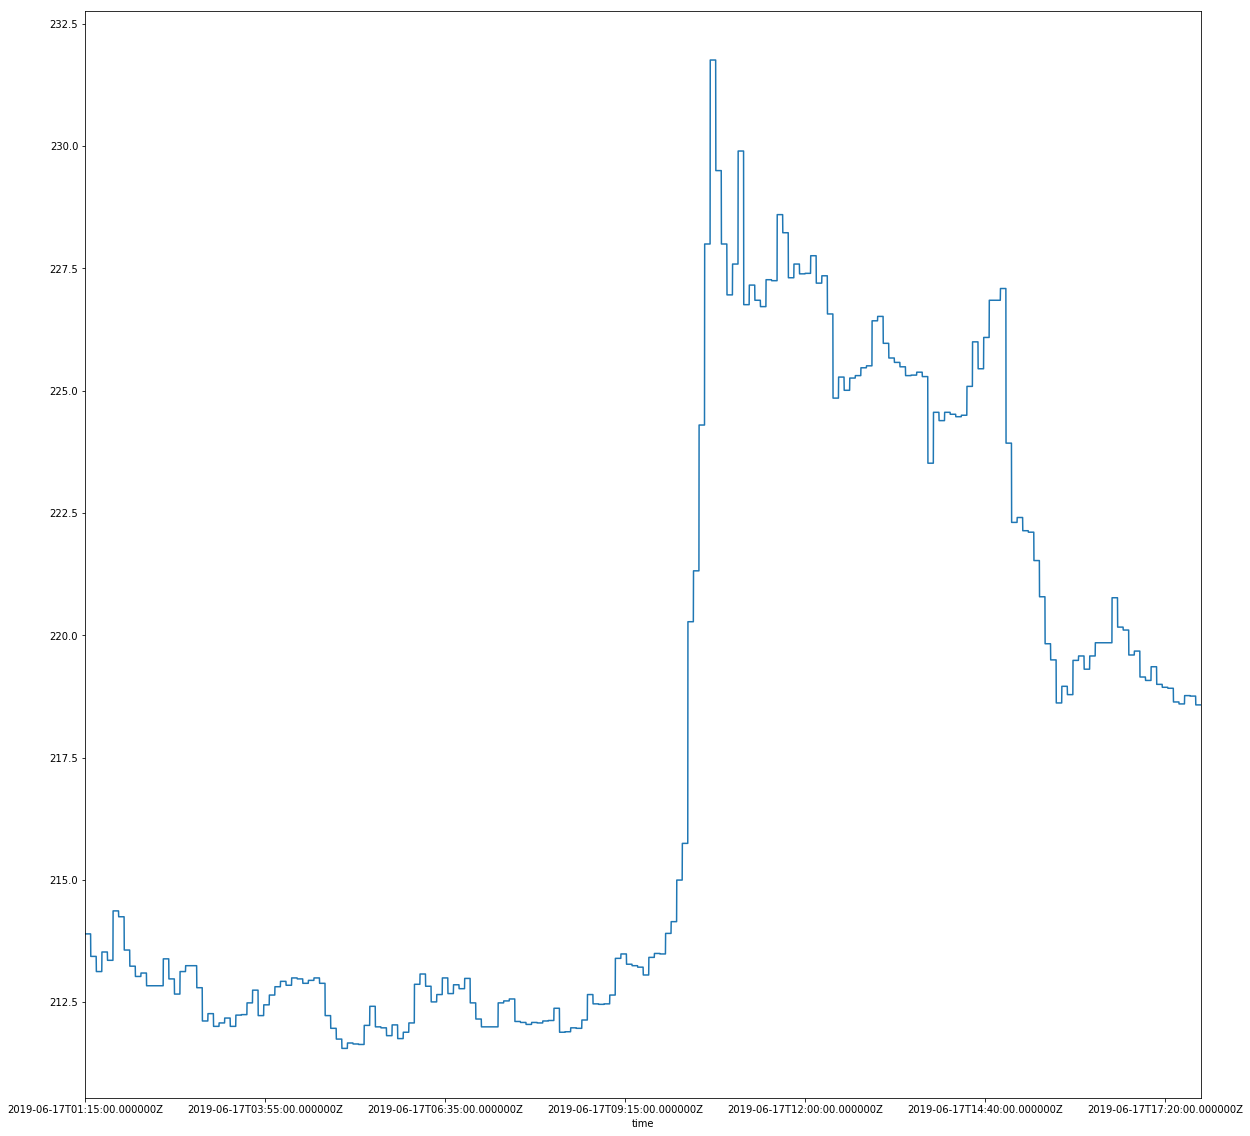

In [29]:
df['close'].plot(figsize=(20,20))